In [14]:
#This program generates the power spectum of FIG.3E 
#Power spectrum of excitatory mean firing rates across all
#layers, showing no signs of oscillatory activity.

In [15]:
import numpy as np
import time
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

In [16]:
#a='simulations_data/Sp_base' #Folder where the spikes files for spontaneous condition 
a='simulations_data/Sp_input' #Folder where the spikes files for input condition 

In [17]:
#layer1
S_vip1i=np.array(np.loadtxt(a+'/S_vip1i.txt') )
S_vip1t=np.array(np.loadtxt(a+'/S_vip1t.txt') )*1000

#layer23
S_e23i=np.array(np.loadtxt(a+'/S_e23i.txt') )
S_e23t=np.array(np.loadtxt(a+'/S_e23t.txt') )*1000

S_pv23i=np.array(np.loadtxt(a+'/S_pv23i.txt') )
S_pv23t=np.array(np.loadtxt(a+'/S_pv23t.txt') )*1000

S_sst23i=np.array(np.loadtxt(a+'/S_sst23i.txt') )
S_sst23t=np.array(np.loadtxt(a+'/S_sst23t.txt') )*1000

S_vip23i=np.array(np.loadtxt(a+'/S_vip23i.txt') )
S_vip23t=np.array(np.loadtxt(a+'/S_vip23t.txt') )*1000

#layer4
S_e4i=np.array(np.loadtxt(a+'/S_e4i.txt') )
S_e4t=np.array(np.loadtxt(a+'/S_e4t.txt') )*1000

S_pv4i=np.array(np.loadtxt(a+'/S_pv4i.txt') )
S_pv4t=np.array(np.loadtxt(a+'/S_pv4t.txt') )*1000

S_sst4i=np.array(np.loadtxt(a+'/S_sst4i.txt') )
S_sst4t=np.array(np.loadtxt(a+'/S_sst4t.txt') )*1000

S_vip4i=np.array(np.loadtxt(a+'/S_vip4i.txt') )
S_vip4t=np.array(np.loadtxt(a+'/S_vip4t.txt') )*1000

#layer5
S_e5i=np.array(np.loadtxt(a+'/S_e5i.txt') )
S_e5t=np.array(np.loadtxt(a+'/S_e5t.txt') )*1000

S_pv5i=np.array(np.loadtxt(a+'/S_pv5i.txt') )
S_pv5t=np.array(np.loadtxt(a+'/S_pv5t.txt') )*1000

S_sst5i=np.array(np.loadtxt(a+'/S_sst5i.txt') )
S_sst5t=np.array(np.loadtxt(a+'/S_sst5t.txt') )*1000

S_vip5i=np.array(np.loadtxt(a+'/S_vip5i.txt') )
S_vip5t=np.array(np.loadtxt(a+'/S_vip5t.txt') )*1000

#layer6
S_e6i=np.array(np.loadtxt(a+'/S_e6i.txt') )
S_e6t=np.array(np.loadtxt(a+'/S_e6t.txt') )*1000

S_pv6i=np.array(np.loadtxt(a+'/S_pv6i.txt') )
S_pv6t=np.array(np.loadtxt(a+'/S_pv6t.txt') )*1000

S_sst6i=np.array(np.loadtxt(a+'/S_sst6i.txt') )
S_sst6t=np.array(np.loadtxt(a+'/S_sst6t.txt') )*1000

S_vip6i=np.array(np.loadtxt(a+'/S_vip6i.txt') )
S_vip6t=np.array(np.loadtxt(a+'/S_vip6t.txt') )*1000

In [18]:
#Function for computation of the firing rates from spikes 
def rates(data,iniz,fin,window,step_size):
    spikes=0
    time=iniz*1000 #Initial time you want to start computing the rates from (of the total lenght of the simulation time)
    all_time=fin*1000 #Final time you want to finish to compute the rates
    rates=[]
    sort_data=np.sort(data)

    while time <= all_time-window:
        for i in range(0,len(data)):
                if time <sort_data[i]< time+window:
                    spikes+=1
                elif sort_data[i]>= time+window:
                    break
        rates.append(spikes/window)
        time+=step_size
        spikes=0
    return rates  

In [19]:
#Function to compute the power spectrum
def power_spectrum(LFP,sec):
    data = LFP
    #print(len(data))
    #le ampiezze non sono relative alle freq in hertz ma al numero di oscillazionin complete nel mio intervallo
    #il primo numero dell'array e' l'ampiezza della frequenza che ci sta una volta (onda che fa 1 giro nell'intervallo), 
    #il secondo numero e' l'ampiezza della frequenza che ci sta due volte (l'onda fa il giro completo 2 volte)
    fourier_transform = np.fft.rfft(data)
    abs_fourier_transform = np.abs(fourier_transform)
    power_spectrum = np.square(abs_fourier_transform)
    #print(fourier_transform[0:100])
    #print(len(fourier_transform)) #Circa meta' della lunghezza della mia time series da analizzare
    #print(power_spectrum)
    # x divided by the time in s of my simulation to obtain Hz (sec is given to the function)
    frequency=[x/sec for x in range(0,len(power_spectrum))]

    return frequency, power_spectrum

In [20]:
#Compute the rates 
#(Now is commented because I already saved in folders, I upload the files below)
#If you want to recompute uncomment the following
# iniz=0
# fin=3
# window=200
# step=1
# rates_e23_s=rates(S_e23t,iniz,fin,window,step)
# rates_e4_s=rates(S_e4t,iniz,fin,window,step)
# rates_e5_s=rates(S_e5t,iniz,fin,window,step)
# rates_e6_s=rates(S_e6t,iniz,fin,window,step)

In [21]:
#I save the data in a folder (depending on the one I do) 
#save_folder='rate_01_01_3sec'
# save_folder='rate_01_01_20sec'
# save_folder='rate_200_1_3sec'
#save_folder='rate_200_1_20sec'
#The one with 3sec is the one receiving the input at 700ms
#The one with 20sec is spontaneous activity

# np.save('simulations_data/RATE_FILE_SAVED/no_plast/'+save_folder+'/r_e23', rates_e23_s)
# np.save('simulations_data/RATE_FILE_SAVED/no_plast/'+save_folder+'/r_e4', rates_e4_s)
# np.save('simulations_data/RATE_FILE_SAVED/no_plast/'+save_folder+'/r_e5', rates_e5_s)
# np.save('simulations_data/RATE_FILE_SAVED/no_plast/'+save_folder+'/r_e6', rates_e6_s)

In [22]:
#I upload the file I saved
#saved_folder='rate_01_01_3sec'
#saved_folder='rate_01_01_20sec'
saved_folder='rate_200_1_3sec'
#saved_folder='rate_200_1_20sec'

r_e23=np.load('simulations_data/RATE_FILE_SAVED/no_plast/'+saved_folder+'/r_e23.npy')
r_e4=np.load('simulations_data/RATE_FILE_SAVED/no_plast/'+saved_folder+'/r_e4.npy')
r_e5=np.load('simulations_data/RATE_FILE_SAVED/no_plast/'+saved_folder+'/r_e5.npy')
r_e6=np.load('simulations_data/RATE_FILE_SAVED/no_plast/'+saved_folder+'/r_e6.npy')

In [23]:
sec=3
#sec=20
freq23,power_sp23=power_spectrum(r_e23,sec)
freq4,power_sp4=power_spectrum(r_e4,sec)
freq5,power_sp5=power_spectrum(r_e5,sec)
freq6,power_sp6=power_spectrum(r_e6,sec)

In [24]:
#Plot the results

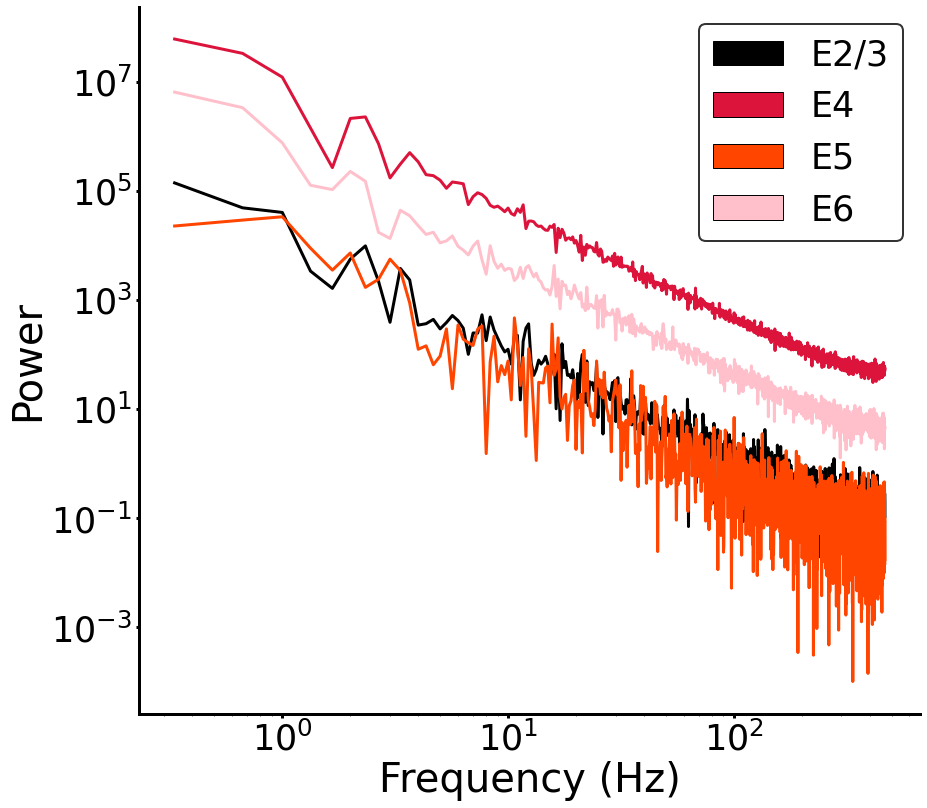

In [25]:
#Create figure
fig, ax = plt.subplots(figsize=(14,13))
#Plot data 
plt.plot(freq23[1:], power_sp23[1:],linewidth=3,label='E2/3',color='k')
plt.plot(freq4[1:], power_sp4[1:],linewidth=3,label='E4',color='crimson')
plt.plot(freq5[1:], power_sp5[1:],linewidth=3,label='E5',color='orangered')
plt.plot(freq6[1:], power_sp6[1:],linewidth=3,label='E6',color='pink')

#Layout
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.setp(ax.spines.values(), linewidth=3)
#Ticks size, layout axes etc
plt.yscale('log')
plt.xscale('log')
#plt.xlim(0,200)
#plt.ylim(0,10**8)
plt.xticks(size=35)
plt.yticks(size=35)
ax.xaxis.set_tick_params(width=3)
ax.yaxis.set_tick_params(width=3)
plt.xlabel('Frequency (Hz)',fontsize=40)
plt.ylabel('Power',fontsize=40)
#plt.locator_params(axis='x', nbins=5)
#plt.locator_params(axis='y', nbins=5)

#Customize legend
legend_elements1 = [
           Patch(facecolor='k',alpha=1, edgecolor='k',
                 label='E2/3'),
               Patch(facecolor='crimson',alpha=1, edgecolor='k',
                 label='E4'),
           Patch(facecolor='orangered',alpha=1, edgecolor='k',
                 label='E5'),
            Patch(facecolor='pink',alpha=1, edgecolor='k',
                 label='E6')]
#Call legend
l1=plt.legend(handles=legend_elements1, loc='best',fontsize=35)
l1.get_frame().set_linewidth(2.0)
l1.get_frame().set_edgecolor('k')

#Save fig
plt.savefig('IMAGES/Fig3E_powerSP.png',  bbox_inches='tight')

#Show fig
plt.show()